# Medical Insurance Cost Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d tejashvi14/medical-insurance-premium-prediction

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction
License(s): CC0-1.0
  0%|                                               | 0.00/7.08k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 7.08k/7.08k [00:00<00:00, 28.5MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Medical Insurance Cost Prediction/medical-insurance-premium-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Medical Insurance Cost Prediction')
zip_ref.close()

## Explratory Data Analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('Medicalpremium.csv')

In [28]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [29]:
df.shape

(986, 11)

In [30]:
df.size

10846

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [33]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

In [36]:
df['PremiumPrice'].value_counts()

PremiumPrice
23000    249
15000    202
28000    132
25000    103
29000     72
30000     47
35000     41
38000     34
31000     31
21000     26
19000     15
26000      7
39000      5
32000      4
24000      4
16000      3
36000      2
18000      2
34000      2
22000      1
20000      1
40000      1
27000      1
17000      1
Name: count, dtype: int64

## Data Visualization

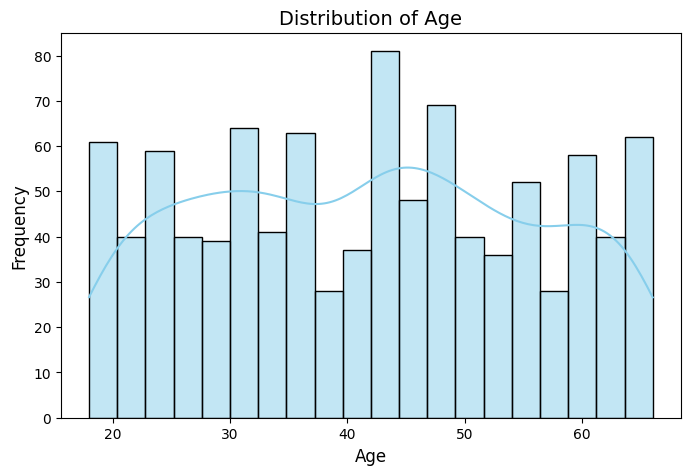

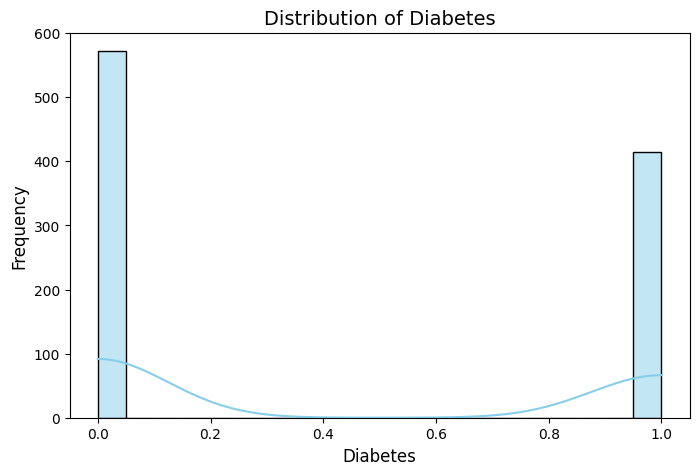

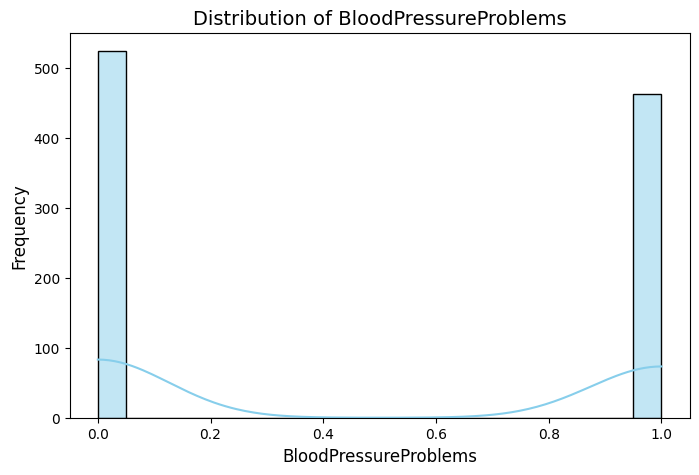

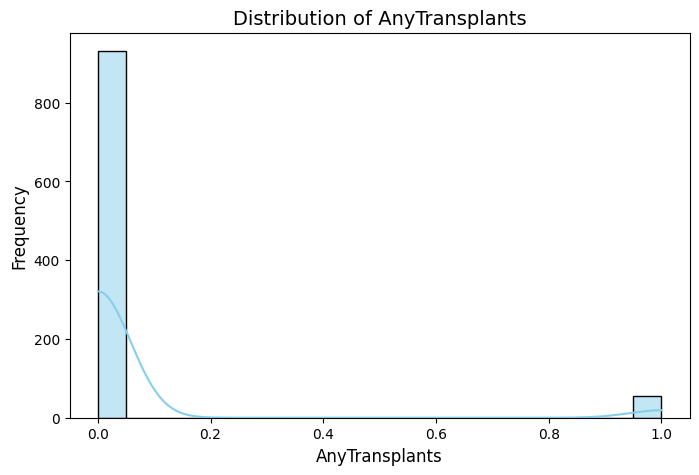

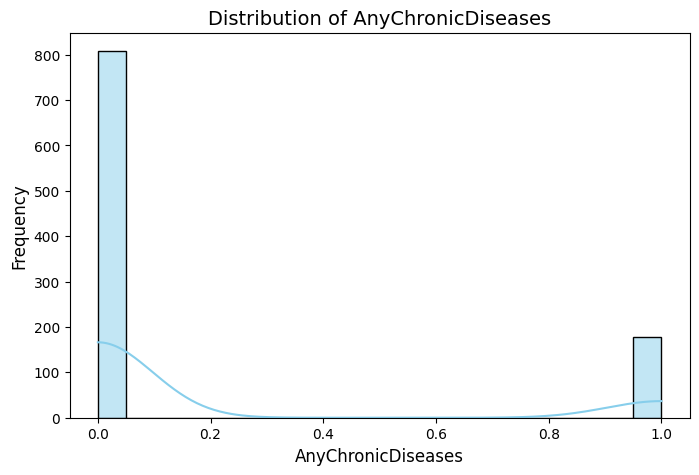

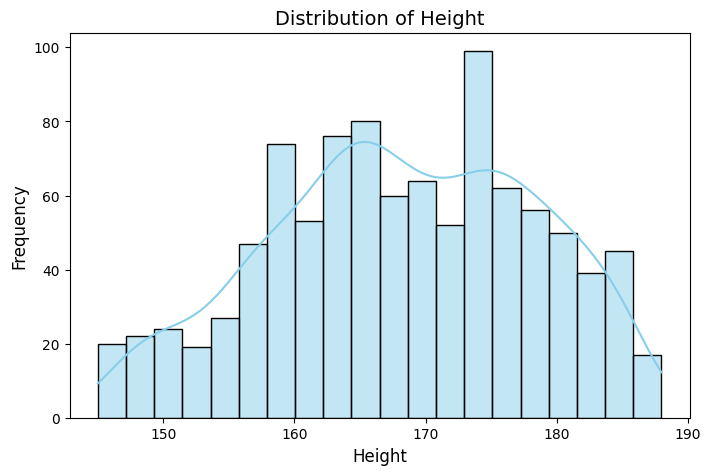

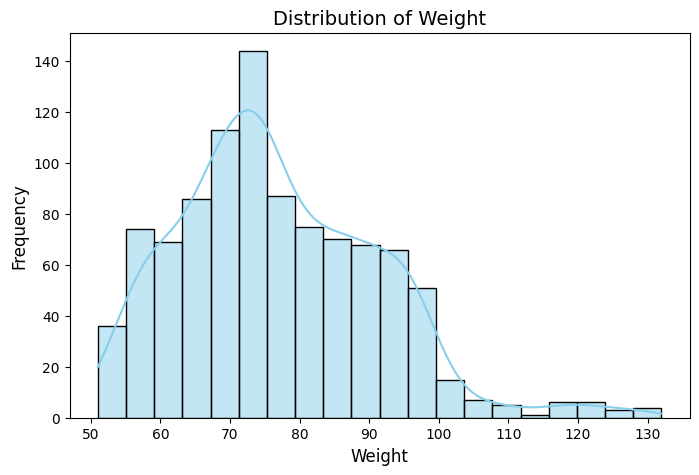

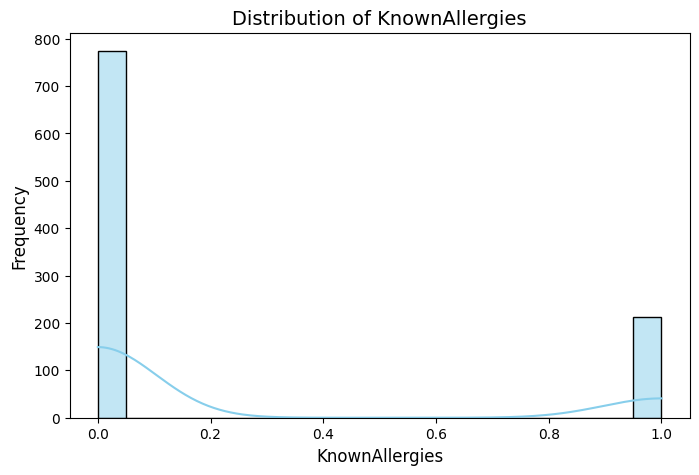

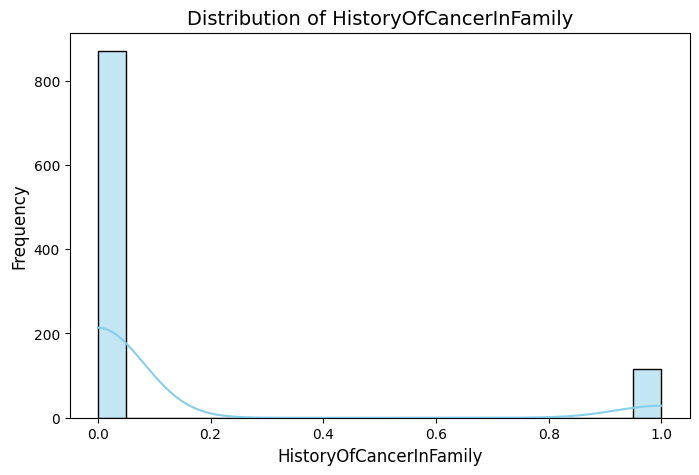

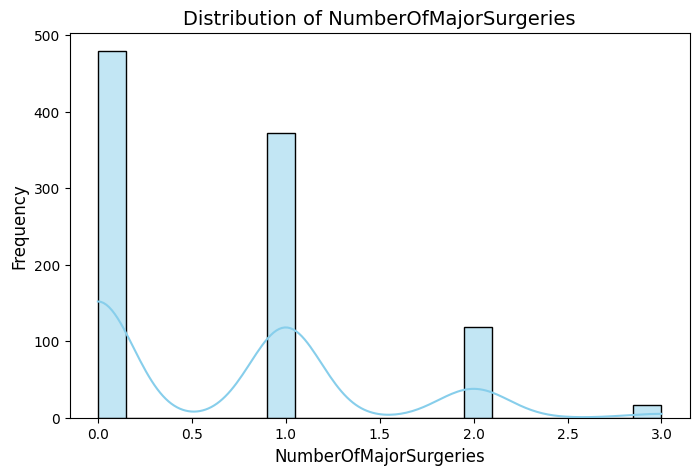

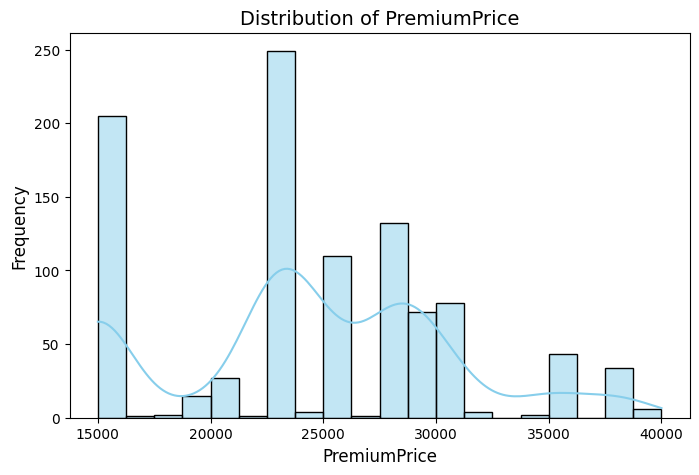

In [37]:
# Get numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 🔹 Histogram for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

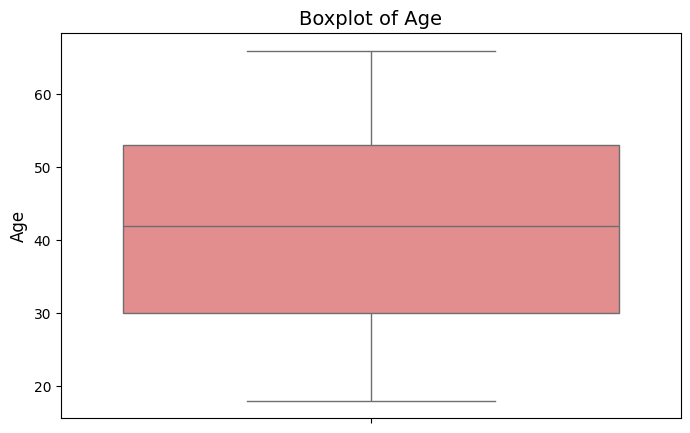

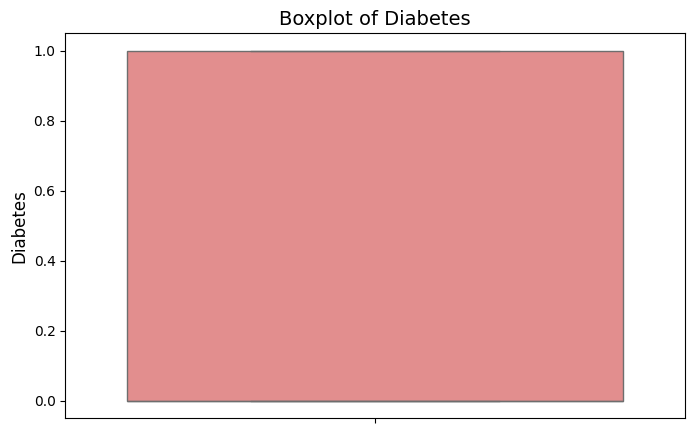

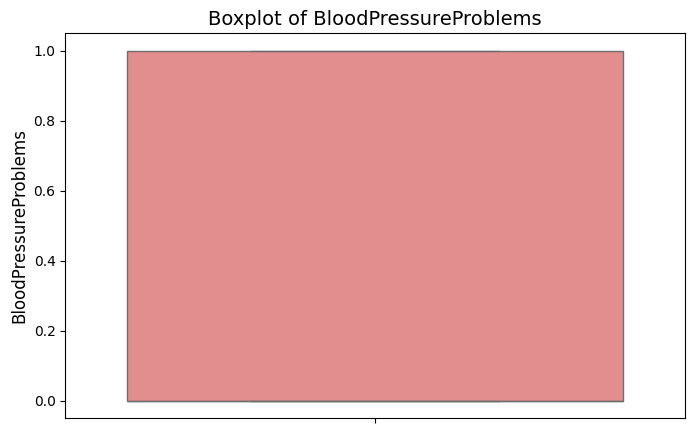

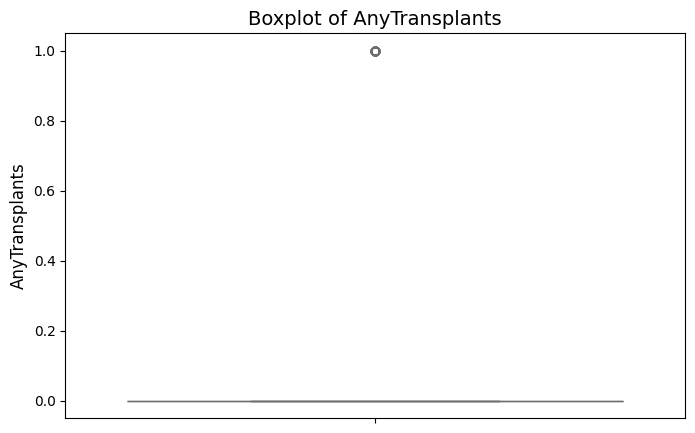

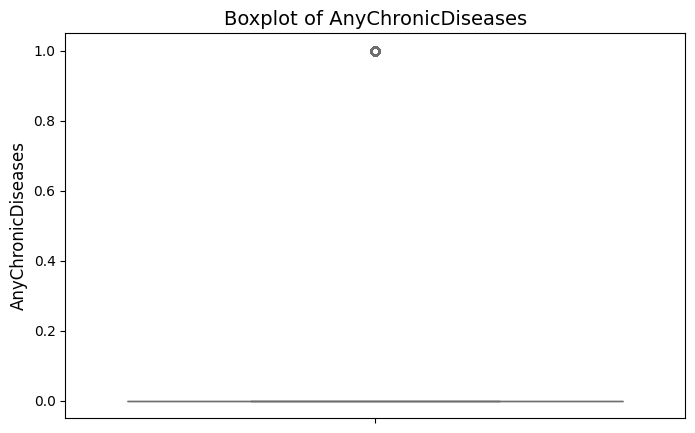

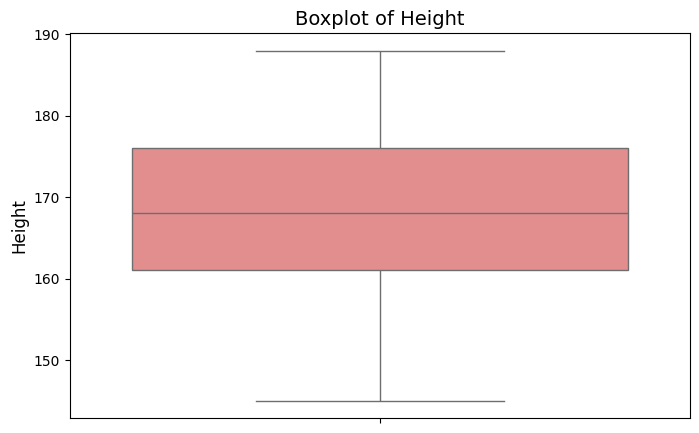

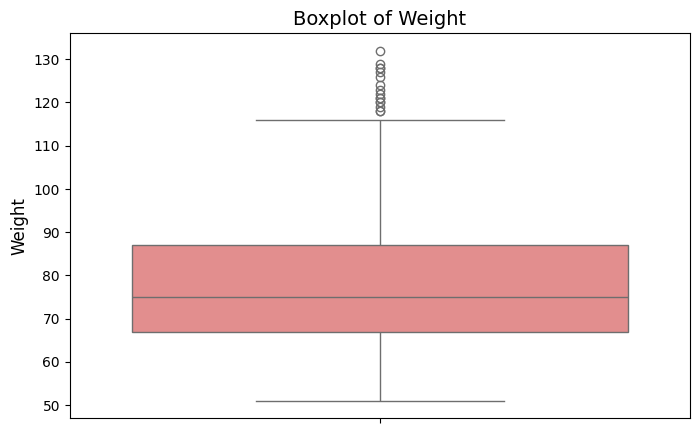

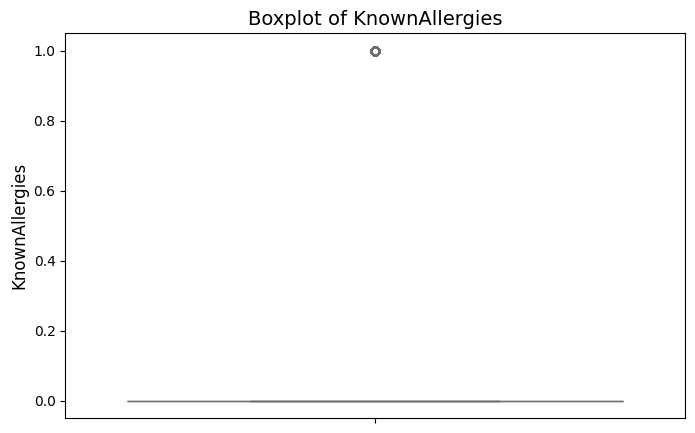

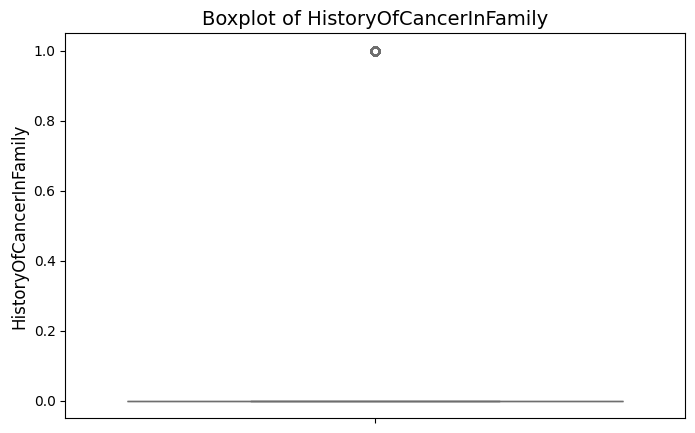

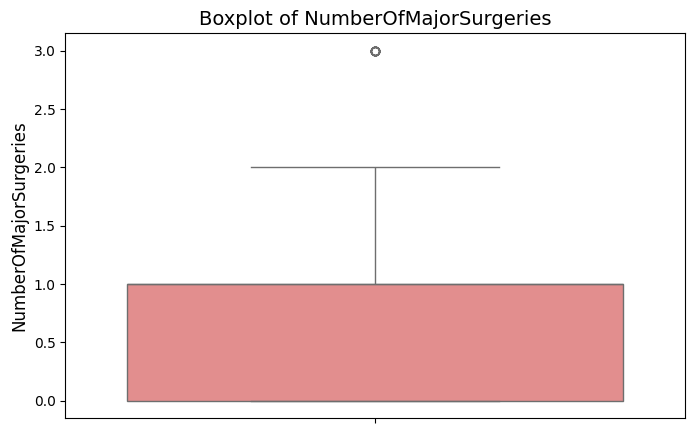

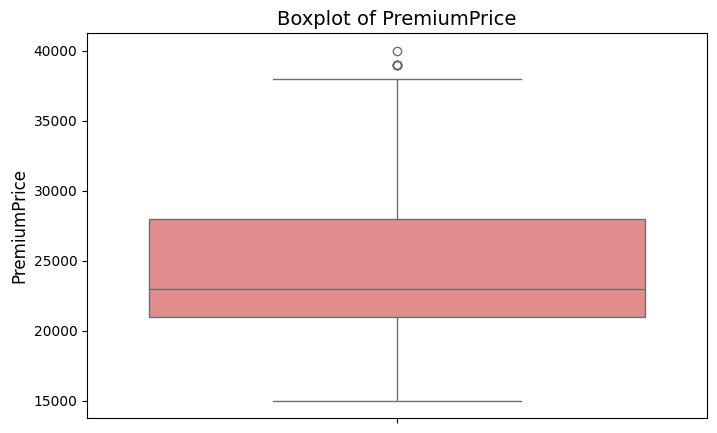

In [38]:
# 🔹 Boxplots for outlier detection

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.ylabel(col, fontsize=12)
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

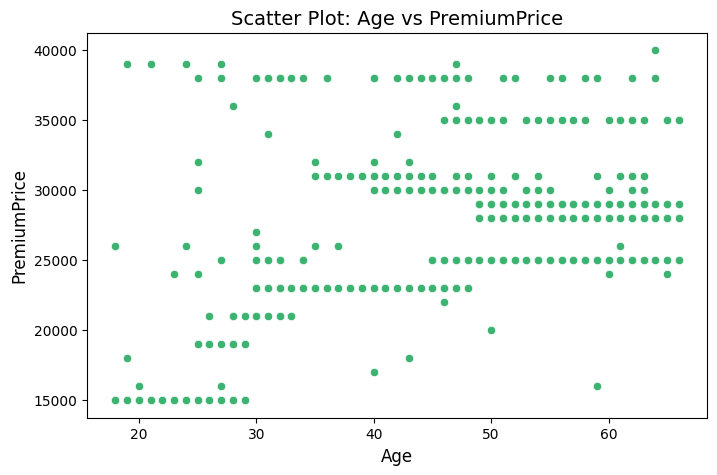

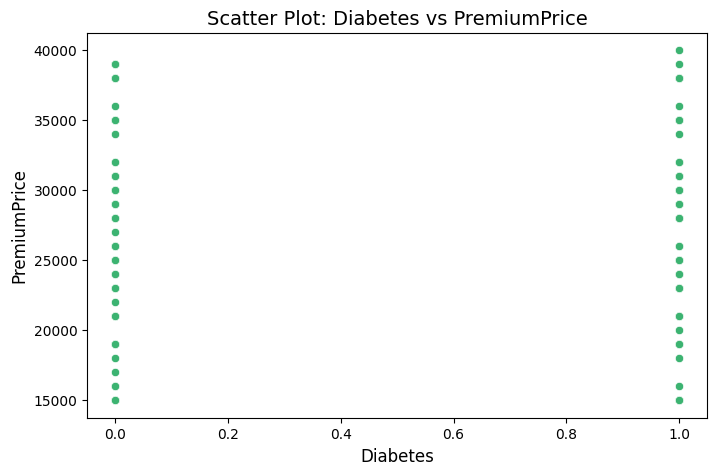

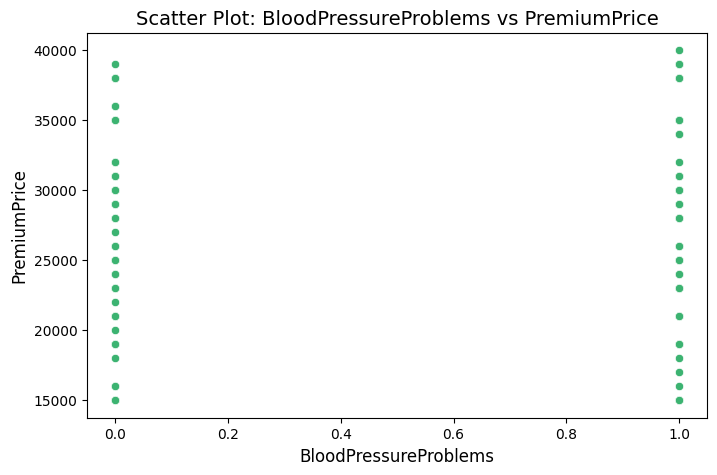

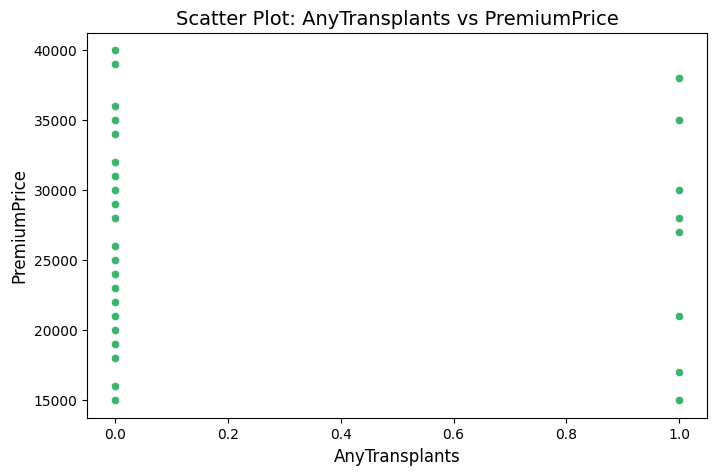

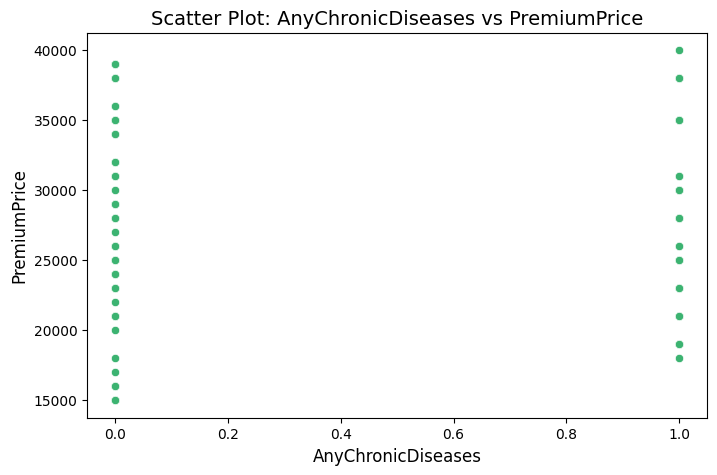

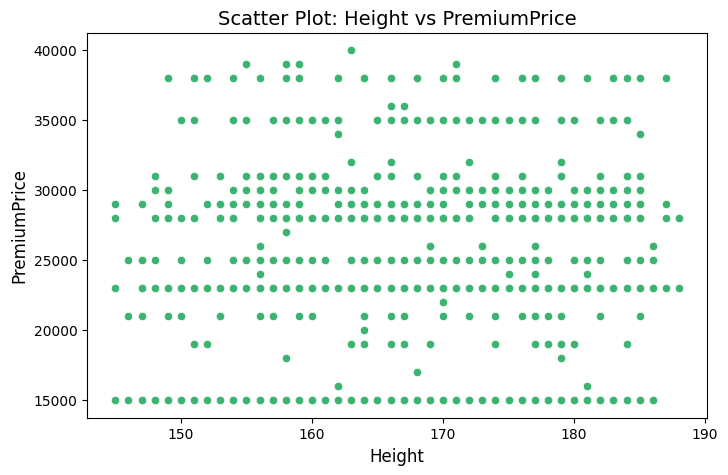

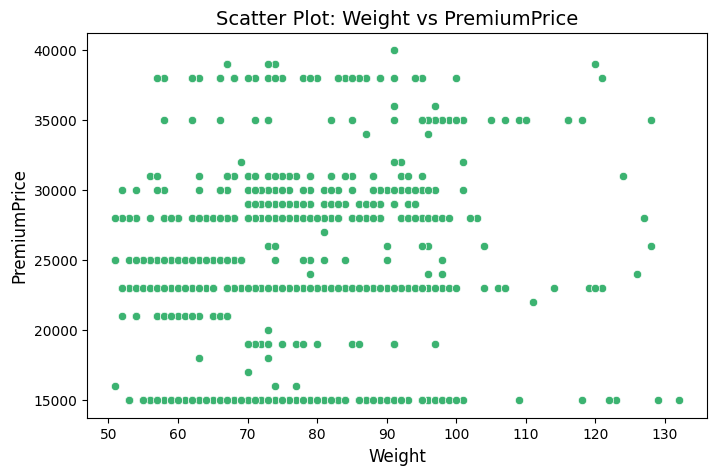

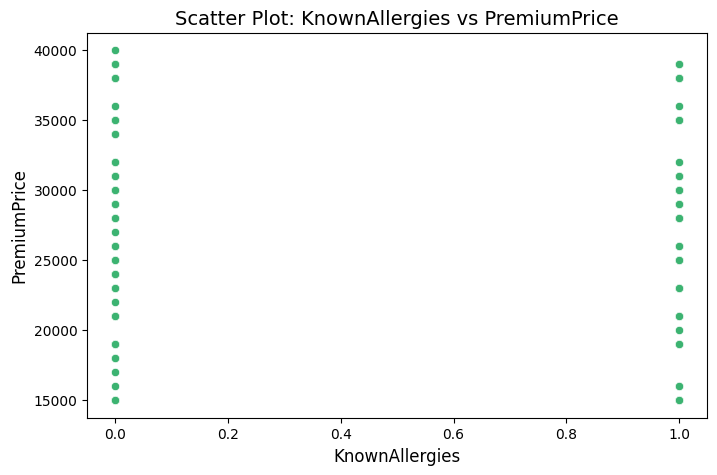

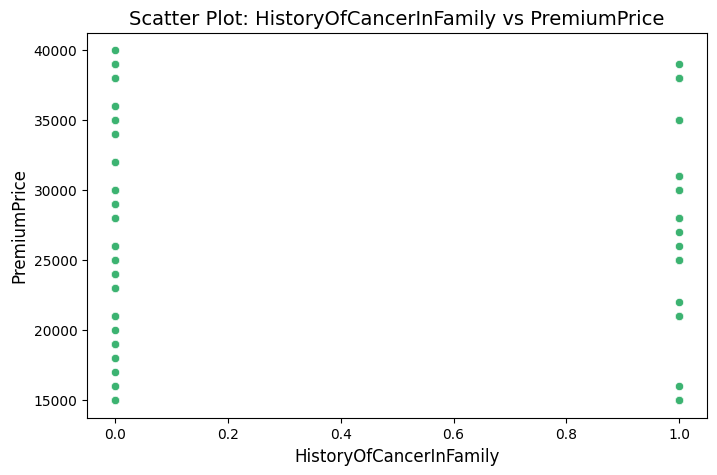

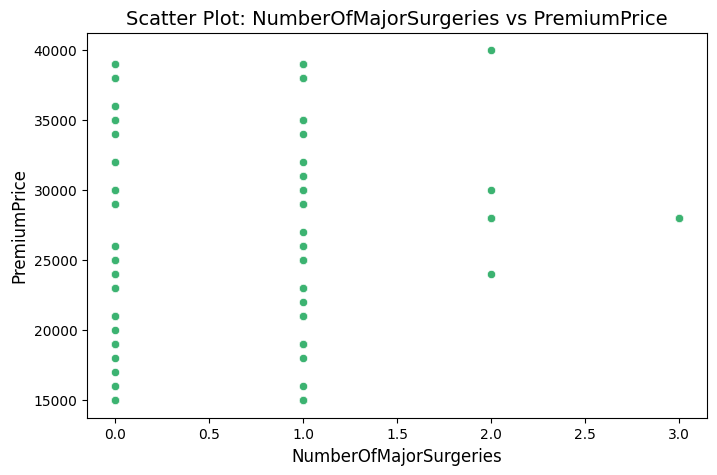

In [39]:
# 🔹 Scatter plots to analyze numerical relationships
for col in numerical_cols:
    if col != "PremiumPrice":  # Replace with target variable if needed
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df["PremiumPrice"], color="mediumseagreen")
        plt.xlabel(col, fontsize=12)
        plt.ylabel("PremiumPrice", fontsize=12)
        plt.title(f"Scatter Plot: {col} vs PremiumPrice", fontsize=14)
        plt.show()

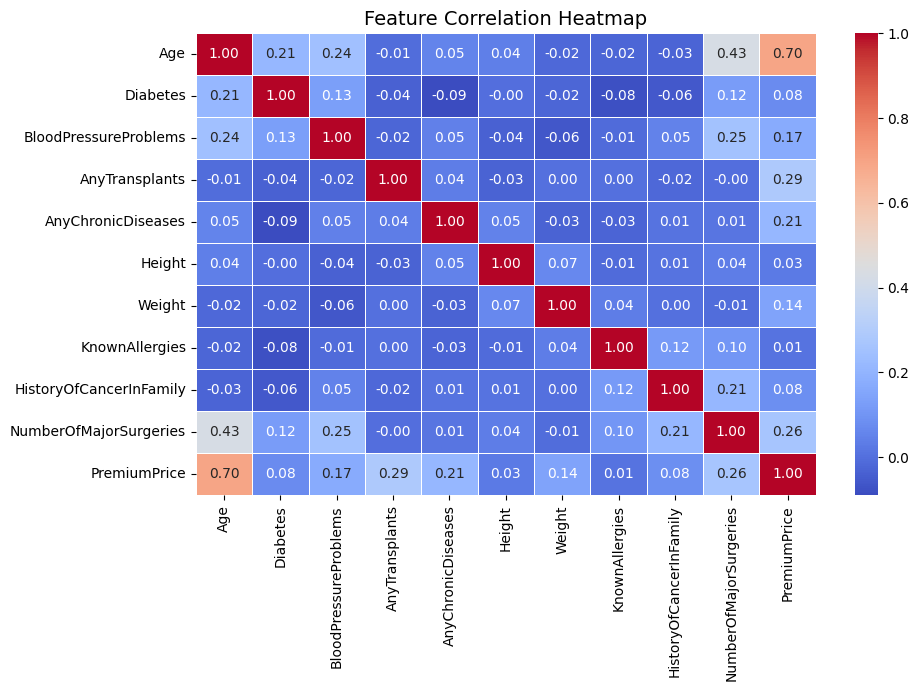

In [41]:
# 🔹 Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## Data Preprocessing

In [44]:
# Applying standard scaler to age column

from sklearn.preprocessing import StandardScaler

df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1,1))

In [45]:
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

In [46]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Model Building

In [48]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [49]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [50]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.7132403238674112,
 0.7987465262413025,
 0.8604738188552479,
 0.6242535397116074,
 0.8554914763223653,
 0.8237804168999526,
 0.6051294198716568,
 -0.049540682836154426,
 0.5467823765020028]

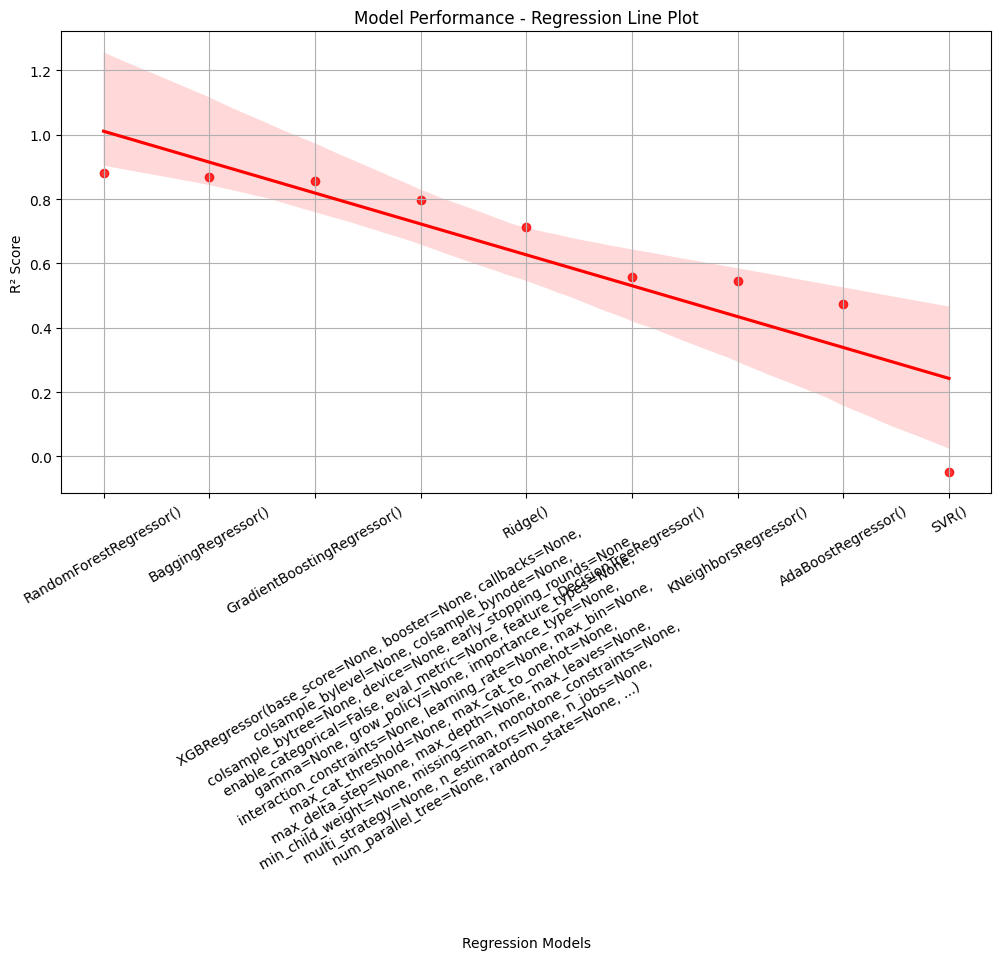

In [51]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()